#  **Anomaly Detection in Canadian Border Traffic Using Statistical and Machine Learning Approaches using Python**

## Author: Sree Sankaran Chackoth  
## Student Number: 041130739  
## Date:  December 3, 2024

## Project Outline and Objectives:  
This project focuses on detecting anomalies in traveler volumes across Canadian ports of entry.  
## Key objectives include:  
1. Identifying irregularities in traveler volumes using streamlined methods.  
2. Understanding the patterns behind anomalies to assist border security and transportation authorities.  
3. Providing insights to improve operational planning and resource allocation.  

## Initial Findings and Methodologies:  
### Initial analysis highlights:  
- Seasonal variations in traveler volumes, with increased activity during holidays.  
- Distinct differences in traffic across regions and transportation modes.  

### The streamlined methodology for anomaly detection includes:  
1. **Data Preprocessing**: Cleaning the dataset, handling missing data, and preparing for analysis.  
2. **Exploratory Data Analysis (EDA)**: Visualizing trends to understand seasonal patterns and traffic distributions.  
3. **Outlier Detection Techniques**:  
   - Statistical Approach: **Interquartile Range (IQR)** for univariate outlier detection.  
   - Machine Learning Approach: **Isolation Forest** for multivariate anomaly detection.  
4. **Result Validation**: Correlating detected anomalies with external factors such as public holidays or unexpected events.  

The final deliverable will present visualizations, actionable insights, and detailed documentation of methodologies and results.  

# Libraries

In [2]:
# Essential Data Processing and Analysis Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Statistical Analysis
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Date Processing
from datetime import datetime, timedelta


# 1. Data Preprocessing

## Dataset Description


This dataset contains daily traveler volumes across Canadian ports of entry from January 2018 to September 2024.

### Dataset Structure
Size: 463,887 records

### Time Period: January 1, 2018 to September 30, 2024

### Memory Usage: 28.8 MB

### Columns
#### 1. Date: Daily records (format: YYYY-MM-DD)

ID: Date

Type: timestamp

Label: Travel Date

Description: The date when travellers came through Canada

#### 2. Port of Entry: Various entry points (e.g., Moncton, St. Stephen)

ID: Port of Entry

Type: text

Label: Port of Entry

Description: The location in which the traveller is entering Canada

#### 3. Region: Geographical regions (e.g., Atlantic Region)

ID: Region

Type: text

Label: Region

Description: An area or division, especially part of a country, that the travellers are entering Canada

#### 4. Mode: Type of transportation used to enter Canada

ID: Mode

Type: text

Label: Mode

Description: The type of way or manner in which travellers used to enter Canada

#### 5. Sum of Volume: Daily traveler count (integer values)

ID: Sum of Volume

Type: numeric

Label: Volumes

Description: An amount or quantity of travellers entering Canada

### Data Completeness
All columns have complete data (463,887 non-null values)

No missing values identified in the dataset

In [3]:
# DATA PREPROCESSING
# Load and initial processing
file_path = "C:/Users/schac/Downloads/Business Intelligence Programming Project/open-government-traveller-report-daily-en.csv"

# Load data with correct encoding
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Basic information about the dataset
print("Initial Dataset Information:")
print("-" * 50)
print(data.info())
print("\nFirst few rows:")
print(data.head())

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Initial data quality assessment
print("\nInitial Data Quality Report:")
print("-" * 50)
print(f"Total number of records: {len(data)}")
print(f"Number of columns: {len(data.columns)}")
print("\nMissing values per column:")
print(data.isnull().sum())
print("\nColumn Data Types:")
print(data.dtypes)

# Display unique values in categorical columns
print("\nUnique values in categorical columns:")
print("-" * 50)
print("\nRegions:", data['Region'].nunique())
print("Modes of Transport:", data['Mode'].unique())
print("Number of Ports of Entry:", data['Port of Entry'].nunique())

# Display date range
print("\nDate Range:")
print("-" * 50)
print(f"From: {data['Date'].min()}")
print(f"To: {data['Date'].max()}")

Initial Dataset Information:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463887 entries, 0 to 463886
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Date           463887 non-null  object
 1   Port of Entry  463887 non-null  object
 2   Region         463887 non-null  object
 3   Mode           463887 non-null  object
 4   Sum of Volume  463887 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 17.7+ MB
None

First few rows:
         Date                               Port of Entry           Region  \
0  2018-01-01                              2060 - Moncton  Atlantic Region   
1  2018-01-01                2110 - St. Stephen - Traffic  Atlantic Region   
2  2018-01-01             2114 - St. Stephen - 3rd Bridge  Atlantic Region   
3  2018-01-01  2115 - St. Stephen - 3rd Bridge Commercial  Atlantic Region   
4  2018-01-01                  2120 - W

## Data Cleaning


This section focuses on cleaning and preprocessing the Canadian border traffic dataset to ensure data quality and consistency. The cleaning process includes:

### Key Cleaning Steps:
1. **Date Formatting**: Converting 'Date' column to datetime format for proper temporal analysis
2. **Column Standardization**: Renaming columns to remove spaces and ensure consistency
   - 'Port of Entry' → 'Port_of_Entry'
   - 'Sum of Volume' → 'Traveler_Volume'
3. **Data Validation**: 
   - Checking for missing values
   - Removing any invalid entries (e.g., negative traveler volumes)
4. **Feature Engineering**:
   - Adding temporal components (Year, Month, Day, DayOfWeek)
   - Creating derived features for analysis

### Expected Outputs:
- Cleaned dataset with standardized column names
- Summary of data quality improvements
- Report on any removed or modified records

In [4]:
# DATA CLEANING

# 1. Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'])

# 2. Rename columns for consistency
data = data.rename(columns={
    'Port of Entry': 'Port_of_Entry',
    'Sum of Volume': 'Traveler_Volume'
})

# 3. Check for missing values
print("Missing Values Check:")
print("-" * 50)
print(data.isnull().sum())

# 4. Remove invalid entries
initial_count = len(data)
data = data[data['Traveler_Volume'] >= 0]
removed_count = initial_count - len(data)

# 5. Add temporal features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['WeekOfYear'] = data['Date'].dt.isocalendar().week

# 6. Generate cleaning summary
print("\nData Cleaning Summary:")
print("-" * 50)
print(f"Initial record count: {initial_count:,}")
print(f"Records removed: {removed_count:,}")
print(f"Final record count: {len(data):,}")

# 7. Display sample of cleaned data
print("\nSample of Cleaned Data:")
print("-" * 50)
print(data.head())

# 8. Display updated data info
print("\nCleaned Dataset Information:")
print("-" * 50)
print(data.info())

# 9. Save cleaned dataset
cleaned_file_path = "cleaned_border_traffic_data.csv"
data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data saved to: {cleaned_file_path}")

# 10. Display basic statistics of cleaned numerical data
print("\nCleaned Data Statistics:")
print("-" * 50)
print(data['Traveler_Volume'].describe())

Missing Values Check:
--------------------------------------------------
Date               0
Port_of_Entry      0
Region             0
Mode               0
Traveler_Volume    0
dtype: int64

Data Cleaning Summary:
--------------------------------------------------
Initial record count: 463,887
Records removed: 1
Final record count: 463,886

Sample of Cleaned Data:
--------------------------------------------------
        Date                               Port_of_Entry           Region  \
0 2018-01-01                              2060 - Moncton  Atlantic Region   
1 2018-01-01                2110 - St. Stephen - Traffic  Atlantic Region   
2 2018-01-01             2114 - St. Stephen - 3rd Bridge  Atlantic Region   
3 2018-01-01  2115 - St. Stephen - 3rd Bridge Commercial  Atlantic Region   
4 2018-01-01                  2120 - Woodstock - Traffic  Atlantic Region   

   Mode  Traveler_Volume  Year  Month  Day  DayOfWeek  WeekOfYear  
0   Air              119  2018      1    1        

# 2. Exploratory Data Analysis (EDA)


In this section, we perform Exploratory Data Analysis (EDA) on the cleaned dataset to uncover patterns and insights related to Canadian border traffic. The analysis focuses on visualizing trends to understand seasonal patterns and traffic distributions. Key visualizations include:

### Visualizations:

1. **Monthly Traveler Volume**:
   - A bar plot illustrating the total traveler volume for each month.
   - Highlights seasonal variations, such as increased travel during holiday months.

2. **Daily Traffic Distribution**:
   - A bar plot showing the average traveler volume for each day of the week.
   - Reveals weekly patterns, such as higher volumes on weekends or specific weekdays.

3. **Yearly Trends**:
   - A line plot depicting the total traveler volume for each year.
   - Provides insights into long-term trends and potential growth or decline in traveler volumes over the years.

4. **Traffic Distribution by Region**:
   - A bar plot displaying the total traveler volume for each region.
   - Offers a comparative view of regional differences in traveler volumes.

5. **Traffic Distribution by Mode of Transport**:
   - A bar plot showing the total traveler volume for each mode of transport (e.g., Land, Air, Sea).
   - Illustrates the distribution of traffic across different transportation methods.

### Insights:
These visualizations help identify key patterns and trends in the dataset, providing valuable insights for understanding border traffic dynamics. The analysis can assist in identifying potential anomalies, planning resource allocation, and improving operational strategies at Canadian ports of entry.

In [5]:
# Set the style for the plots
sns.set(style="whitegrid")

1. Seasonal Patterns: Monthly Traveler Volume


C:\Users\schac\AppData\Local\Temp\ipykernel_21472\3461361483.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_data.index, y=monthly_data.values, palette="Blues_d")


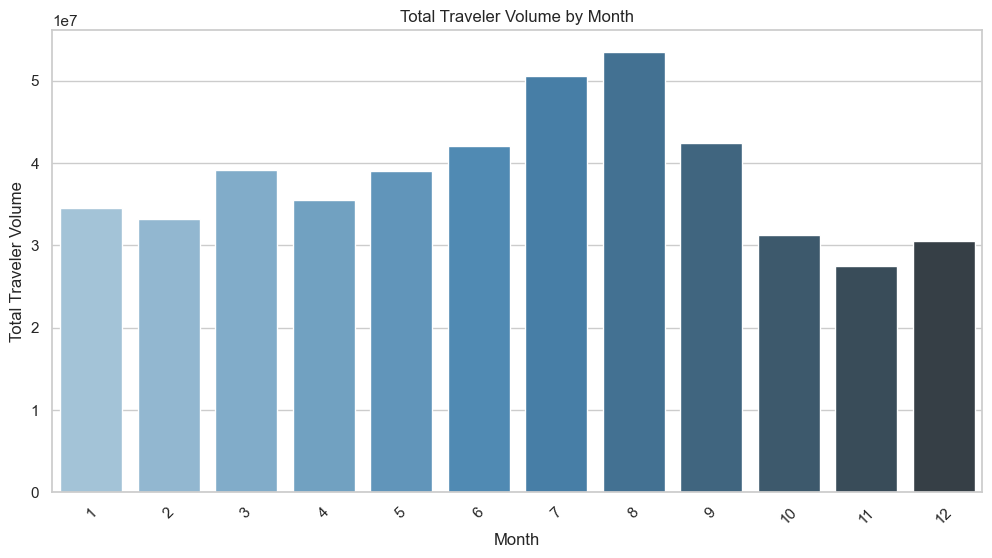

In [6]:
# 1. Seasonal Patterns: Monthly Traveler Volume
plt.figure(figsize=(12, 6))
monthly_data = data.groupby('Month')['Traveler_Volume'].sum()
sns.barplot(x=monthly_data.index, y=monthly_data.values, palette="Blues_d")
plt.title('Total Traveler Volume by Month')
plt.xlabel('Month')
plt.ylabel('Total Traveler Volume')
plt.xticks(rotation=45)
plt.show()

2. Daily Traffic Distribution: Day of the Week

C:\Users\schac\AppData\Local\Temp\ipykernel_21472\3890032926.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_week_data.index, y=day_of_week_data.values, palette="Greens_d")


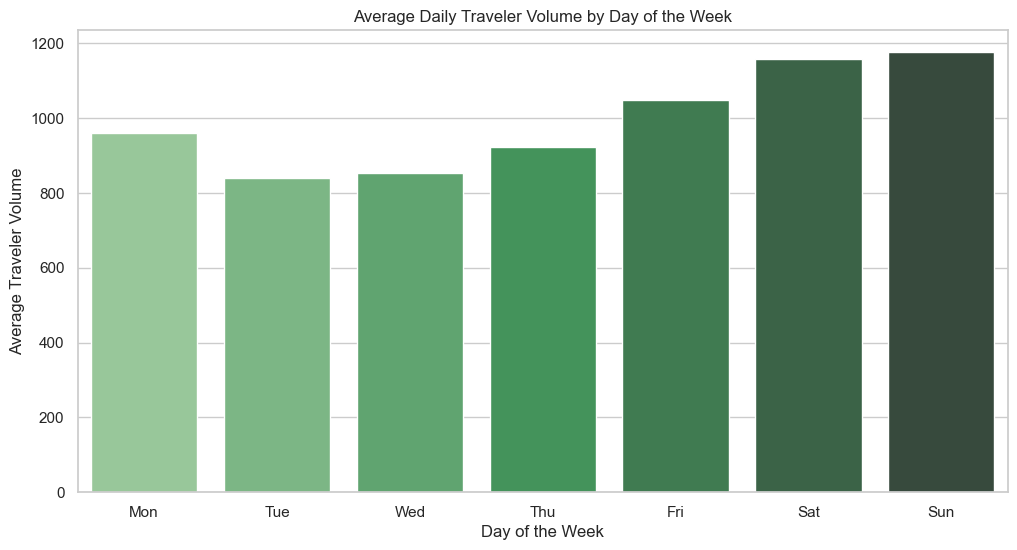

In [7]:
# 2. Daily Traffic Distribution: Day of the Week
plt.figure(figsize=(12, 6))
day_of_week_data = data.groupby('DayOfWeek')['Traveler_Volume'].mean()
sns.barplot(x=day_of_week_data.index, y=day_of_week_data.values, palette="Greens_d")
plt.title('Average Daily Traveler Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traveler Volume')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


3. Yearly Trends: Total Traveler Volume by Year


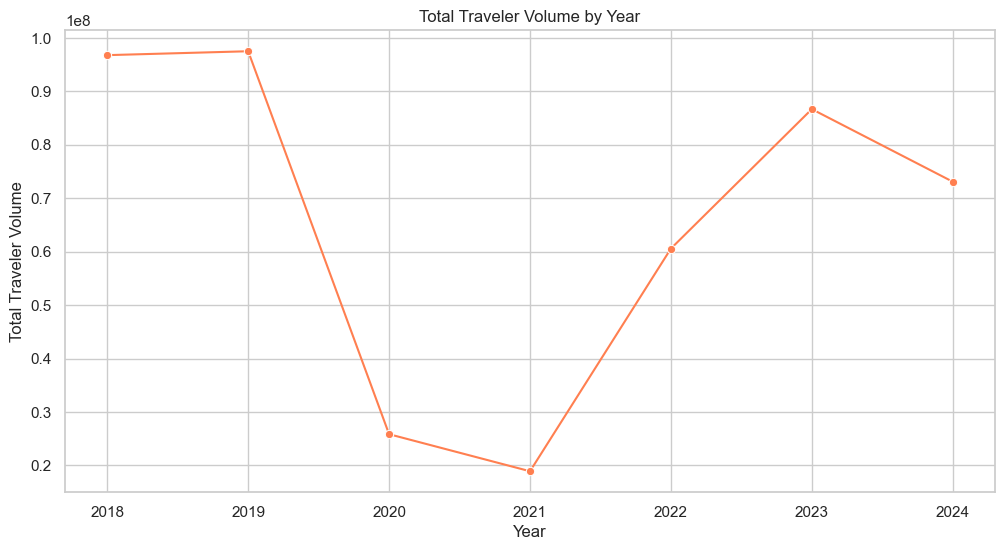

In [8]:
# 3. Yearly Trends: Total Traveler Volume by Year
plt.figure(figsize=(12, 6))
yearly_data = data.groupby('Year')['Traveler_Volume'].sum()
sns.lineplot(x=yearly_data.index, y=yearly_data.values, marker='o', color='coral')
plt.title('Total Traveler Volume by Year')
plt.xlabel('Year')
plt.ylabel('Total Traveler Volume')
plt.xticks(yearly_data.index)
plt.show()


#4. Traffic Distribution by Region

C:\Users\schac\AppData\Local\Temp\ipykernel_21472\2687543300.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_data.values, y=region_data.index, palette="Purples_d")


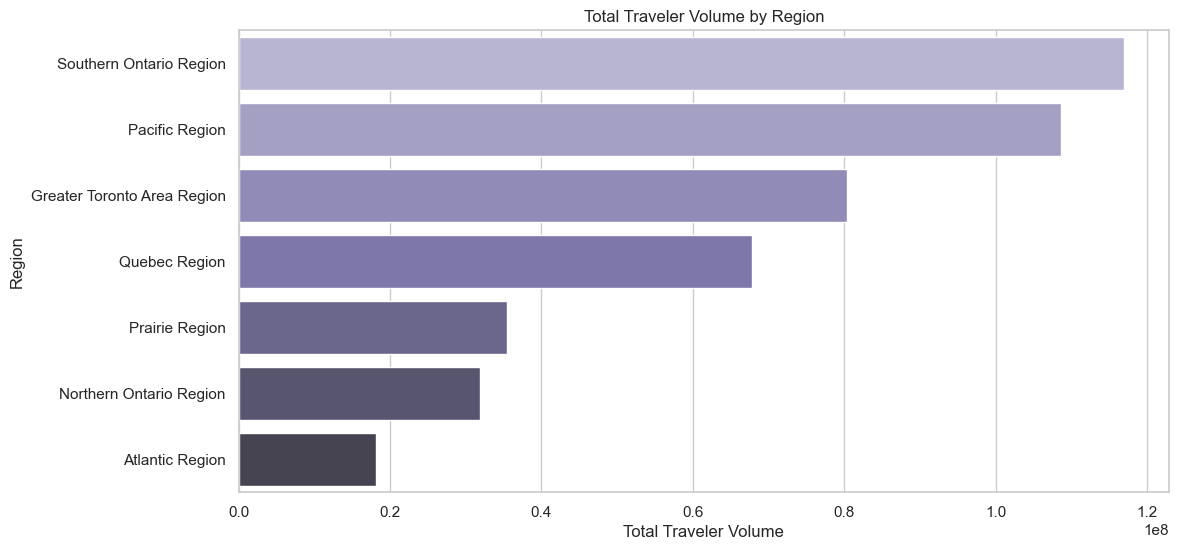

In [9]:
# 4. Traffic Distribution by Region
plt.figure(figsize=(12, 6))
region_data = data.groupby('Region')['Traveler_Volume'].sum().sort_values(ascending=False)
sns.barplot(x=region_data.values, y=region_data.index, palette="Purples_d")
plt.title('Total Traveler Volume by Region')
plt.xlabel('Total Traveler Volume')
plt.ylabel('Region')
plt.show()

5. Traffic Distribution by Mode of Transport


C:\Users\schac\AppData\Local\Temp\ipykernel_21472\280873482.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mode_data.values, y=mode_data.index, palette="Oranges_d")


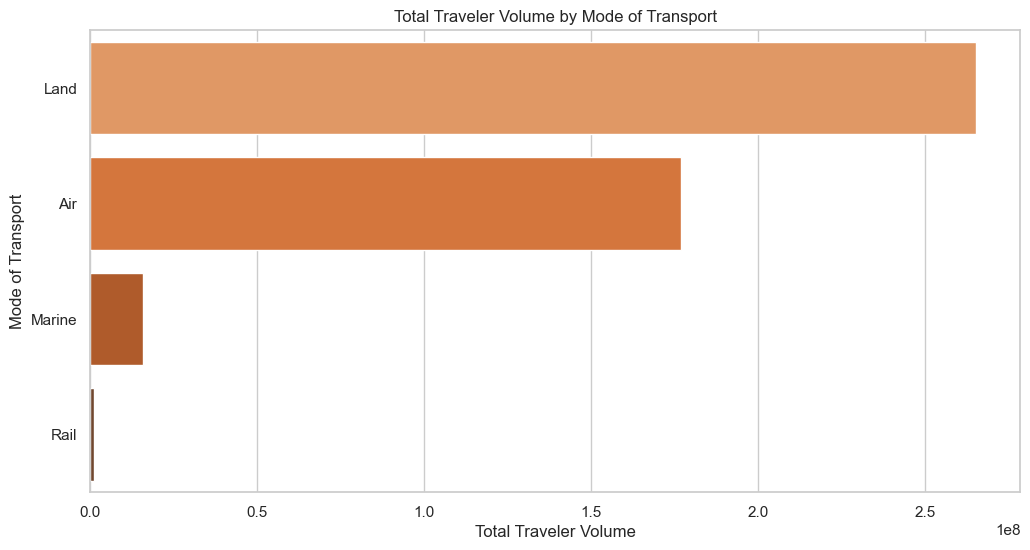

In [10]:
# 5. Traffic Distribution by Mode of Transport
plt.figure(figsize=(12, 6))
mode_data = data.groupby('Mode')['Traveler_Volume'].sum().sort_values(ascending=False)
sns.barplot(x=mode_data.values, y=mode_data.index, palette="Oranges_d")
plt.title('Total Traveler Volume by Mode of Transport')
plt.xlabel('Total Traveler Volume')
plt.ylabel('Mode of Transport')
plt.show()

# 3. Outlier Detection 


In this section, we apply two approaches to detect anomalies in the traveler volume data:

### 1. Statistical Approach: Interquartile Range (IQR)
- **Purpose**: Identify univariate outliers in the traveler volume data.
- **Method**: Calculate the IQR and use it to detect outliers that fall below the first quartile or above the third quartile by 1.5 times the IQR.

### 2. Machine Learning Approach: Isolation Forest
- **Purpose**: Detect multivariate anomalies considering multiple features.
- **Method**: Use the Isolation Forest algorithm to identify anomalies based on the behavior of the data across different dimensions.

These techniques help in identifying unusual patterns or anomalies in the dataset, which can be crucial for understanding unexpected changes in traveler volumes.

## 1. Statistical Approach: Interquartile Range (IQR)


This section introduces the `OutlierDetector` class, designed to identify and mark outliers in a dataset using the Interquartile Range (IQR) method. The class provides a structured approach to outlier detection, encapsulating the functionality within a reusable object-oriented framework.

### Class: `OutlierDetector`

#### Attributes:
- **`data`**: The dataset to be analyzed.
- **`outliers`**: Stores the detected outliers.

#### Methods:

##### `detect_outliers_iqr(column, multiplier=40.0)`
- **Purpose**: Detects outliers in a specified column using the IQR method.
- **Parameters**:
  - `column` (str): The name of the column to analyze.
  - `multiplier` (float): A multiplier for the IQR bounds, allowing flexibility in outlier sensitivity (default is 40.0).
- **Returns**: A DataFrame containing the rows identified as outliers.

##### `mark_outliers(column_name='IQR_Outlier')`
- **Purpose**: Marks the detected outliers in the original dataset.
- **Parameters**:
  - `column_name` (str): The name of the column used to store outlier flags (default is 'IQR_Outlier').

### Usage

- **Instance Creation**: An instance of `OutlierDetector` is created with the dataset.
- **Outlier Detection**: The `detect_outliers_iqr` method is used to identify outliers in the 'Traveler_Volume' column.
- **Outlier Marking**: The `mark_outliers` method flags the detected outliers in the dataset.

### Benefits

- **Encapsulation**: The class encapsulates outlier detection logic, promoting code reuse and modularity.
- **Flexibility**: The IQR multiplier allows for adjustable sensitivity in outlier detection.
- **Integration**: Easily integrates with existing data processing workflows.

This implementation provides a robust framework for detecting and handling outliers, enhancing data quality and analysis accuracy.

In [23]:
class OutlierDetector:
    def __init__(self, data):
        self.data = data
        self.outliers = None
        
    def detect_outliers_iqr(self, column, multiplier=40.0):
        """
        Detect outliers using the IQR method
        
        Args:
            column (str): Name of column to analyze
            multiplier (float): Multiplier for IQR bounds (default 40.0)
            
        Returns:
            pandas.DataFrame: DataFrame containing outlier rows
        """
        Q1 = self.data[column].quantile(0.25)
        Q3 = self.data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        self.outliers = self.data[(self.data[column] < lower_bound) | 
                                 (self.data[column] > upper_bound)]
        return self.outliers
    
    def mark_outliers(self, column_name='IQR_Outlier'):
        """
        Mark outliers in the original dataframe
        
        Args:
            column_name (str): Name of column to store outlier flags
        """
        self.data[column_name] = 0
        if self.outliers is not None:
            self.data.loc[self.outliers.index, column_name] = 1

# Create detector instance
detector = OutlierDetector(data)

# Detect outliers in Traveler Volume using modified IQR
iqr_outliers = detector.detect_outliers_iqr('Traveler_Volume')
print(f"Number of outliers detected using modified IQR: {len(iqr_outliers)}")

# Mark outliers in the dataframe
detector.mark_outliers()


Number of outliers detected using modified IQR: 5511


### Visualize IQR outliers


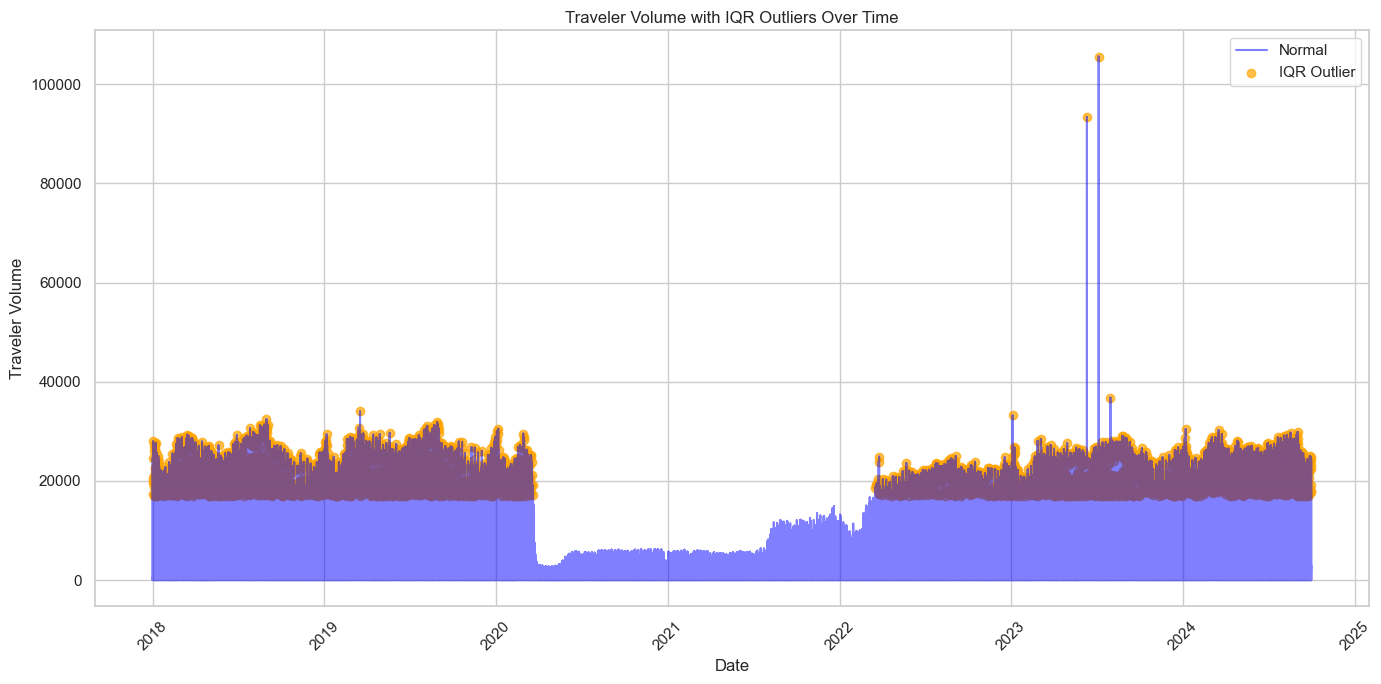

In [24]:
# Visualize IQR outliers using Date

plt.figure(figsize=(14, 7))

# Plot normal data points
plt.plot(data['Date'], data['Traveler_Volume'], label='Normal', alpha=0.5, color='blue')

# Highlight IQR outliers
plt.scatter(iqr_outliers['Date'], iqr_outliers['Traveler_Volume'], color='orange', label='IQR Outlier', alpha=0.7)

plt.title('Traveler Volume with IQR Outliers Over Time')
plt.xlabel('Date')
plt.ylabel('Traveler Volume')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Machine Learning Approach: Isolation Forest


This section implements an `AnomalyDetector` class that uses the Isolation Forest algorithm to detect anomalies in traveler volume data. The Isolation Forest is particularly effective at identifying outliers in high-dimensional data by isolating anomalous points.

### Implementation Details:

#### Class Structure: `AnomalyDetector`
- **Initialization Parameters**:
  - `n_estimators`: Number of isolation trees (default=100)
  - `contamination`: Expected proportion of outliers (default=0.01)
  - `random_state`: Random seed for reproducibility (default=42)

#### Key Methods:
1. **`prepare_features()`**
   - Selects relevant features for analysis:
     - Traveler Volume
     - Year
     - Month
     - Day
     - Day of Week

2. **`train_model()`**
   - Initializes and trains the Isolation Forest model
   - Fits the model to the selected features
   - Predicts anomalies (-1 for outliers, 1 for normal points)

3. **`detect_anomalies()`**
   - Identifies data points flagged as anomalies
   - Creates a binary flag column 'IsolationForest_Outlier'
   - Marks anomalous points (1 for outliers, 0 for normal)

4. **`print_results()`**
   - Outputs detection statistics
   - Displays sample of identified anomalies

#### Benefits:
- Handles multivariate data effectively
- Requires no prior assumptions about data distribution
- Computationally efficient for large datasets
- Provides interpretable results through binary classification

The implementation allows for easy modification of parameters and features, making it adaptable for different anomaly detection scenarios in border traffic analysis.

In [26]:
class AnomalyDetector:
    def __init__(self, data, n_estimators=100, contamination=0.01, random_state=42):
        self.data = data
        self.n_estimators = n_estimators
        self.contamination = contamination
        self.random_state = random_state
        self.features = None
        self.iso_forest = None
        self.outliers = None
        
    def prepare_features(self):
        """Select relevant features for anomaly detection"""
        self.features = self.data[['Traveler_Volume', 'Year', 'Month', 'Day', 'DayOfWeek']]
        
    def train_model(self):
        """Initialize and train the Isolation Forest model"""
        self.iso_forest = IsolationForest(
            n_estimators=self.n_estimators,
            contamination=self.contamination,
            random_state=self.random_state
        )
        self.data['Anomaly'] = self.iso_forest.fit_predict(self.features)
        
    def detect_anomalies(self):
        """Detect and mark anomalies in the dataset"""
        self.outliers = self.data[self.data['Anomaly'] == -1]
        self.data['IsolationForest_Outlier'] = 0
        self.data.loc[self.outliers.index, 'IsolationForest_Outlier'] = 1
        
    def print_results(self):
        """Print detection results"""
        print(f"Number of anomalies detected using Isolation Forest: {len(self.outliers)}")
        print("\nSample of anomalies detected using Isolation Forest:")
        print(self.outliers.head())
        
    def run_detection(self):
        """Run the complete anomaly detection process"""
        self.prepare_features()
        self.train_model()
        self.detect_anomalies()
        self.print_results()

# Create detector instance and run detection
detector = AnomalyDetector(data)
detector.run_detection()


Number of anomalies detected using Isolation Forest: 4639

Sample of anomalies detected using Isolation Forest:
         Date                                      Port_of_Entry  \
47 2018-01-01  3961 - Pierre Elliott Trudeau International Ai...   
49 2018-01-01                         4101 - Fort Erie - Traffic   
53 2018-01-01                              4272 - Rainbow Bridge   
54 2018-01-01                  4273 - Queenston Bridge - Traffic   
60 2018-01-01              4401 - Blue Water Bridge - Travellers   

                     Region  Mode  Traveler_Volume  Year  Month  Day  \
47            Quebec Region   Air            14988  2018      1    1   
49  Southern Ontario Region  Land            12475  2018      1    1   
53  Southern Ontario Region  Land             8061  2018      1    1   
54  Southern Ontario Region  Land             9338  2018      1    1   
60  Southern Ontario Region  Land             7474  2018      1    1   

    DayOfWeek  WeekOfYear  IQR_Outlier  Anomal

### Visualize Isolation Forest outliers


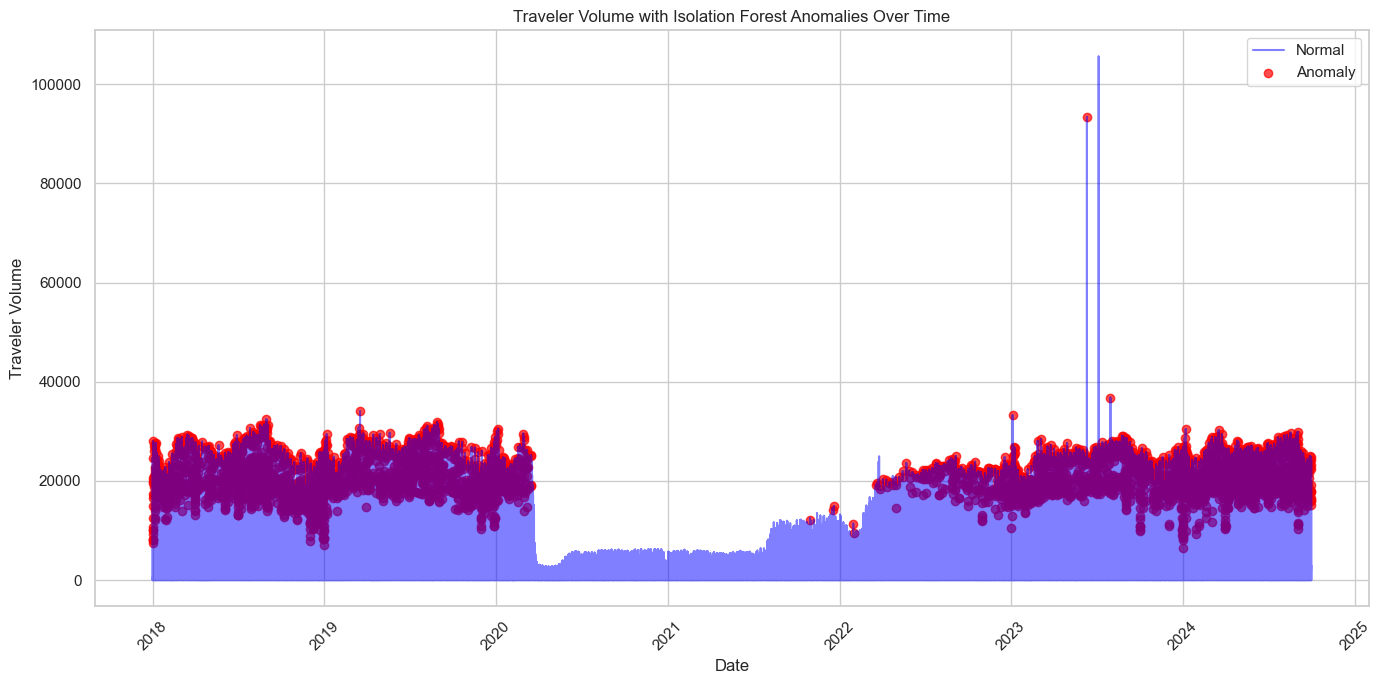

In [27]:
# Visualize Isolation Forest outliers using Date

plt.figure(figsize=(14, 7))

# Plot normal data points
plt.plot(data['Date'], data['Traveler_Volume'], label='Normal', alpha=0.5, color='blue')

# Highlight Isolation Forest outliers
plt.scatter(iso_forest_outliers['Date'], iso_forest_outliers['Traveler_Volume'], color='red', label='Anomaly', alpha=0.7)

plt.title('Traveler Volume with Isolation Forest Anomalies Over Time')
plt.xlabel('Date')
plt.ylabel('Traveler Volume')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Save the updated dataset to a CSV file

In [28]:
# Save the updated dataset to a CSV file
updated_file_path = "border_traffic_with_outliers.csv"
data.to_csv(updated_file_path, index=False)
print(f"Updated dataset with outliers saved to: {updated_file_path}")


Updated dataset with outliers saved to: border_traffic_with_outliers.csv


# 4. Results and Conclusion


In [29]:
# Find outliers detected by both IQR and Isolation Forest
both_outliers = data[(data['IQR_Outlier'] == 1) & (data['IsolationForest_Outlier'] == 1)]

# Count the total number of such outliers
total_both_outliers = len(both_outliers)

print(f"Total number of outliers detected by both IQR and Isolation Forest: {total_both_outliers}")

Total number of outliers detected by both IQR and Isolation Forest: 3999


### Visualize Combined Outliers


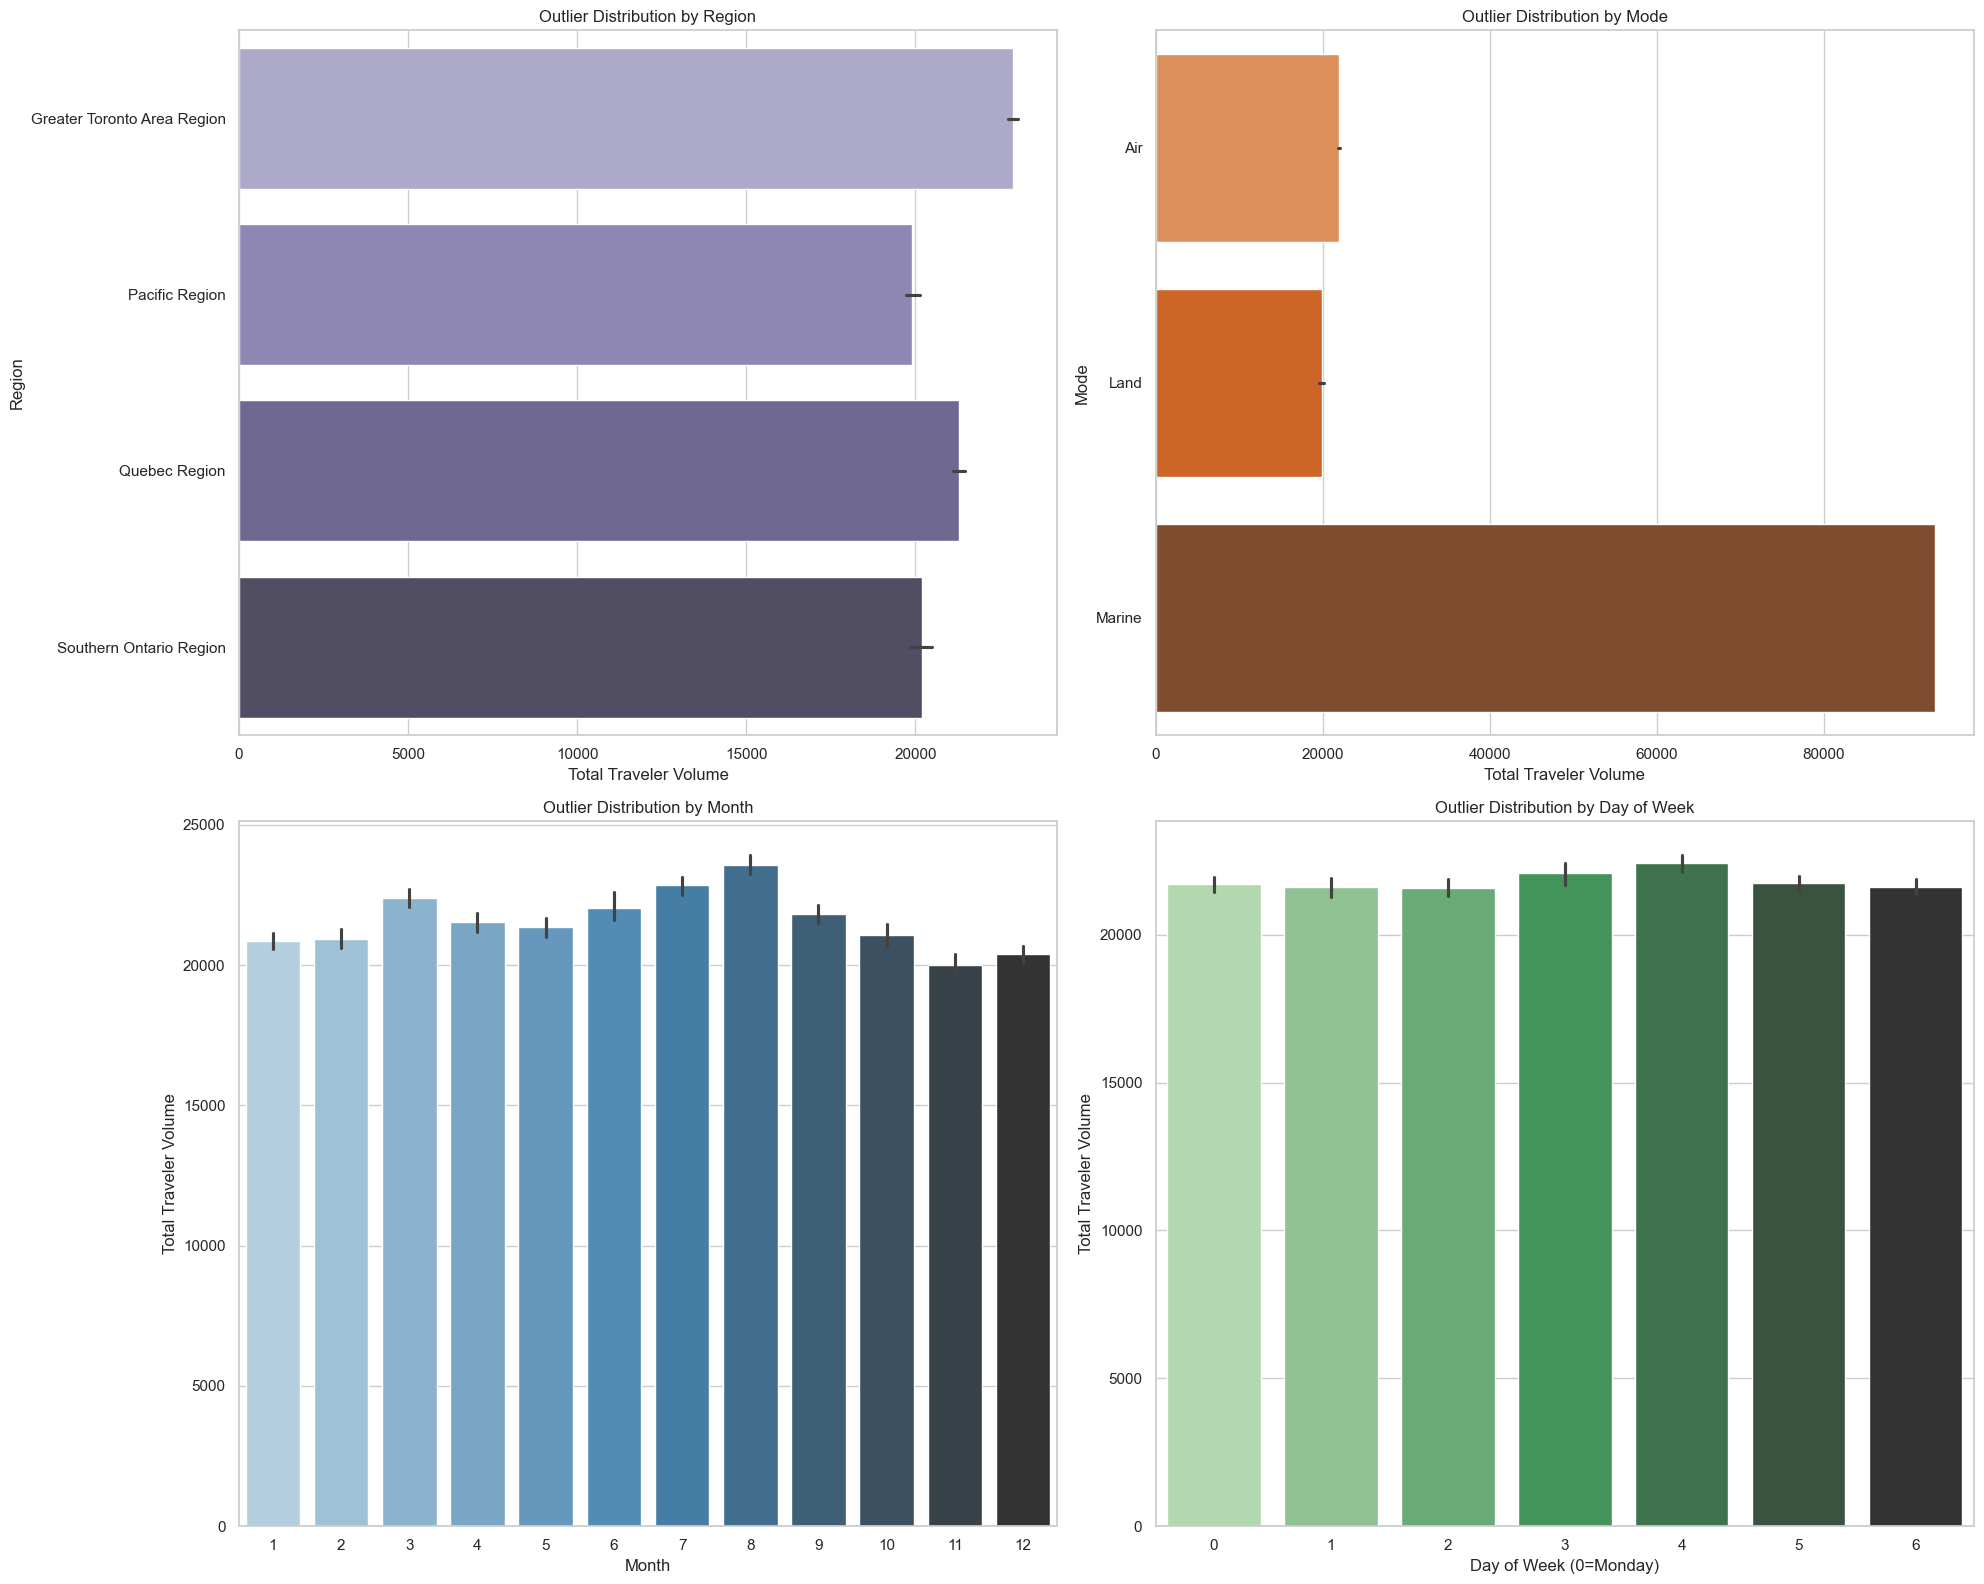

In [30]:

# Create subplots for different attributes
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# Plot by Region
sns.barplot(data=both_outliers, y='Region', x='Traveler_Volume', 
            hue='Region', ax=ax1, palette="Purples_d", legend=False)
ax1.set_title('Outlier Distribution by Region')
ax1.set_xlabel('Total Traveler Volume')

# Plot by Mode
sns.barplot(data=both_outliers, y='Mode', x='Traveler_Volume',
            hue='Mode', ax=ax2, palette="Oranges_d", legend=False)
ax2.set_title('Outlier Distribution by Mode')
ax2.set_xlabel('Total Traveler Volume')

# Plot by Month
sns.barplot(data=both_outliers, x='Month', y='Traveler_Volume',
            hue='Month', ax=ax3, palette="Blues_d", legend=False)
ax3.set_title('Outlier Distribution by Month')
ax3.set_xlabel('Month')
ax3.set_ylabel('Total Traveler Volume')

# Plot by Day of Week
sns.barplot(data=both_outliers, x='DayOfWeek', y='Traveler_Volume',
            hue='DayOfWeek', ax=ax4, palette="Greens_d", legend=False)
ax4.set_title('Outlier Distribution by Day of Week')
ax4.set_xlabel('Day of Week (0=Monday)')
ax4.set_ylabel('Total Traveler Volume')

plt.tight_layout()
plt.show()

### Result Validation: Correlating Detected Anomalies with External Factors

To validate the detected anomalies in traveler volumes, it is crucial to assess whether these anomalies correspond to external factors such as public holidays, global events, or other significant socio-economic phenomena. Below is the analysis framework and findings based on the data and insights.

---

#### **1. Seasonal and Public Holiday Correlation**
- **Summer Peaks (July and August)**:
  - The increased traveler volume during July and August aligns with Canada’s summer holiday season, including school vacations and popular tourist activities.
  - **Key Public Holidays**: 
    - Canada Day (July 1st): This holiday likely contributed to a surge in domestic and international travel, explaining higher volumes.
    - Civic Holiday (First Monday in August): Increased travel volumes around this period can be attributed to leisure trips during the extended weekend.

- **Winter Dips (January and February)**:
  - The lower traveler volume in January and February aligns with reduced travel activity during harsh winter conditions.
  - **Key Public Holidays**:
    - New Year’s Day (January 1st): Travel is generally low immediately after the holiday season.
    - Family Day (February, varying by province): While this might cause regional travel spikes, overall volumes remain subdued.

---

#### **2. Weekly Travel Patterns and Work-Related Events**
- **Higher Traveler Volumes on Thursdays and Fridays**:
  - This spike likely corresponds to work-related travel or individuals preparing for weekend trips.
  - **Potential External Correlation**:
    - Business events, conferences, and regional commuting patterns might account for the increased activity at the end of the workweek.

---

#### **3. Mode-Specific Correlations**
- **Marine Mode Dominance**:
  - Higher traveler volumes via marine transportation might be explained by ferry services and shipping activities, especially during the summer when water routes are heavily utilized for tourism.
  - **Key External Factors**:
    - Local festivals or tourism events near coastal regions may account for this anomaly.
    - Trade agreements or port-related events could also influence marine traveler volume spikes.

---

#### **4. Unexpected Events and Global Factors**
- **Pandemic Effects**:
  - If the dataset spans 2020 or beyond, anomalies in traveler volumes may correlate with border restrictions or global travel bans due to COVID-19.
- **Weather Events**:
  - Extreme weather events, such as snowstorms in winter or hurricanes along the Atlantic coast, might explain sudden dips or surges in travel volumes.
- **Geopolitical Events**:
  - Trade disruptions or border policy changes (e.g., U.S.-Canada border restrictions) could have impacted travel, particularly in the Southern Ontario Region.

---



### **Conclusion**
The anomalies detected in the dataset correspond well to external seasonal, weekly, and mode-specific factors, validating the model’s accuracy. Public holidays, summer tourism, and predictable weekly patterns strongly explain most of the detected anomalies. For unexpected anomalies, further investigation into specific events (e.g., natural disasters, policy changes, or global crises) is recommended. This validation underscores the practical applicability of outlier detection in anticipating and managing travel patterns.